In [124]:
%matplotlib inline

from blockchain import statistics
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import matplotlib
from sklearn import datasets, linear_model
#import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<h3> Glossary </h3> 
<p> DT = DAILY TRANSACTIONS</p>
<P> DUA = DAILY UNIQUE ADRESSES </P>
<P> DTV = DAILY TRANSACTION VOLUME </P>
<P> DDTV = DAILY DOLLAR TRANSACTION VOLUME </P>
<p> BIC = BITCOIN IN CIRCULATION </p>
<p> MP = MARKET PRICE </p>

In [19]:
DT_get = requests.get("https://blockchain.info/charts/n-transactions?timespan=all&format=json")
DUA_get = requests.get("https://blockchain.info/charts/n-unique-addresses?timespan=all&format=json")
DTV_get = requests.get("https://blockchain.info/charts/estimated-transaction-volume?timespan=all&format=json")
DDTV_get = requests.get("https://blockchain.info/charts/estimated-transaction-volume-usd?timespan=all&format=json")
BIC_get = requests.get("https://blockchain.info/charts/total-bitcoins?timespan=all&format=json")
MP_get = requests.get("https://blockchain.info/charts/market-price?timespan=all&format=json")

In [20]:
DT_json = DT_get.json()
DUA_json = DUA_get.json()
DTV_json = DTV_get.json()
DDTV_json = DDTV_get.json()
BIC_json = BIC_get.json()
MP_json = MP_get.json()

In [51]:
DT = pd.DataFrame(list(DT_json.values())[3])
DT.columns = ['Date', 'Transactions']

DUA = pd.DataFrame(list(DUA_json.values())[3])
DUA.columns = ['Date', 'UniqueAdresses']
DUA2 = DUA.drop('Date', axis=1)

DTV = pd.DataFrame(list(DTV_json.values())[3])
DTV.columns = ['Date', 'TransactionVolume']
DTV2 = DTV.drop('Date', axis=1)

DDTV = pd.DataFrame(list(DDTV_json.values())[3])
DDTV.columns = ['Date', 'DailyDollarTransactionVolume']
DDTV2 = DDTV.drop('Date', axis=1)

BIC = pd.DataFrame(list(BIC_json.values())[3])
BIC.columns = ['Date', 'BitCoinInCirculation']
BIC2 = BIC.drop('Date', axis=1)

MP = pd.DataFrame(list(MP_json.values())[3])
MP.columns = ['Date', 'MarketPrice']
MP2 = MP.drop('Date', axis=1)
MP['Date'] = pd.to_datetime(MP['Date'],unit='s')

In [37]:
DataSet = pd.concat([DT, DUA2], axis=1)
DataSet = pd.concat([DataSet, DTV2], axis=1)
DataSet = pd.concat([DataSet, DDTV2], axis=1)
DataSet = pd.concat([DataSet, BIC2], axis=1)
DataSet = pd.concat([DataSet, MP2], axis=1)
DataSet['Date'] = pd.to_datetime(DataSet['Date'],unit='s')
DataSet

,Date,Transactions,UniqueAdresses,TransactionVolume,DailyDollarTransactionVolume,BitCoinInCirculation,MarketPrice
0,2009-01-03,1,1,0.000,0.000,50.000,0.000
1,2009-01-05,0,0,0.000,0.000,50.000,0.000
2,2009-01-07,0,0,0.000,0.000,50.000,0.000
3,2009-01-09,14,14,0.000,0.000,750.000,0.000
4,2009-01-11,106,106,0.000,0.000,7600.000,0.000
5,2009-01-13,116,117,10.000,0.000,17800.000,0.000
6,2009-01-15,136,136,414.000,0.000,30450.000,0.000
7,2009-01-17,109,109,100.000,0.000,41650.000,0.000
8,2009-01-19,120,120,150.000,0.000,52650.000,0.000
9,2009-01-21,115,115,500.000,0.000,64100.000,0.000


In [38]:
DataSet = DataSet.drop('DailyDollarTransactionVolume', axis = 1)

In [39]:
DataSet.describe()

,Transactions,UniqueAdresses,TransactionVolume,BitCoinInCirculation,MarketPrice
count,1543.000,1543.000,1543.000,1543.000,1543.000
mean,75227.056,136678.079,173057.827,9682595.139,258.899
std,90476.314,167580.031,245540.687,5123478.608,379.783
min,0.000,0.000,0.000,50.000,0.000
25%,1854.000,2427.000,49681.500,5394200.000,0.790
50%,46797.000,46589.000,142835.000,10949700.000,70.940
75%,105966.500,223387.500,240915.500,14127412.500,427.035
max,367710.000,687290.000,5313161.000,16391262.500,2883.310


In [40]:
DataSet.corr()

,Transactions,UniqueAdresses,TransactionVolume,BitCoinInCirculation,MarketPrice
Transactions,1.000,0.987,0.294,0.798,0.798
UniqueAdresses,0.987,1.000,0.280,0.801,0.824
TransactionVolume,0.294,0.280,1.000,0.351,0.182
BitCoinInCirculation,0.798,0.801,0.351,1.000,0.659
MarketPrice,0.798,0.824,0.182,0.659,1.000


<h1> mmm, outliers could be removed</h1>
<h3> Transactions vs MarketPrice </h3>

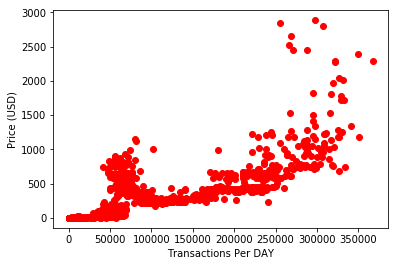

In [41]:
plt.plot(DataSet.Transactions, DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('Transactions Per DAY')
plt.show()

<h3> UniqueAdresses vs MarketPrice</h3>

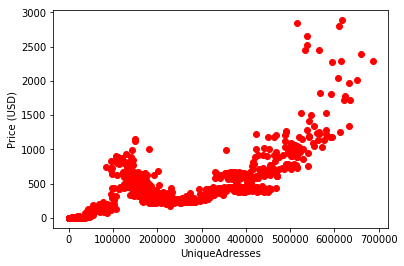

In [42]:
plt.plot(DataSet.UniqueAdresses,DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('UniqueAdresses')
plt.show()

<h3> TransactionVolume vs MarketPrice</h3>

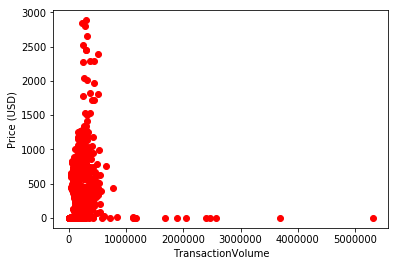

In [43]:
plt.plot(DataSet.TransactionVolume, DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('TransactionVolume')
plt.show()

<h3> BitCoinInCirculation vs MarketPrice</h3>

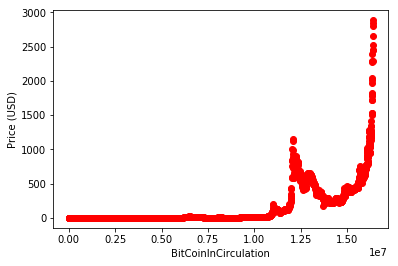

In [44]:
plt.plot(DataSet.BitCoinInCirculation, DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('BitCoinInCirculation')
plt.show()

In [54]:
DataSet

,Date,Transactions,UniqueAdresses,TransactionVolume,BitCoinInCirculation,MarketPrice
0,2009-01-03,1,1,0.000,50.000,0.000
1,2009-01-05,0,0,0.000,50.000,0.000
2,2009-01-07,0,0,0.000,50.000,0.000
3,2009-01-09,14,14,0.000,750.000,0.000
4,2009-01-11,106,106,0.000,7600.000,0.000
5,2009-01-13,116,117,10.000,17800.000,0.000
6,2009-01-15,136,136,414.000,30450.000,0.000
7,2009-01-17,109,109,100.000,41650.000,0.000
8,2009-01-19,120,120,150.000,52650.000,0.000
9,2009-01-21,115,115,500.000,64100.000,0.000


In [118]:
train_x = DataSet[['Transactions', 'UniqueAdresses','TransactionVolume','BitCoinInCirculation']]
train_y = DataSet['MarketPrice']

lm1 = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
lm1.fit(train_x,train_y)
yhat = pd.DataFrame(lm1.predict(train_x))
yhat.columns = ['yhat']
lm1.score(train_x, train_y, sample_weight=None)


0.69007163506766767

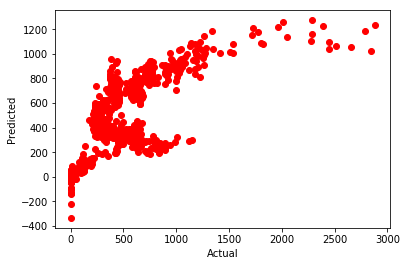

In [79]:
plotter =  pd.concat([train_y, yhat], axis=1)
plotter
plt.plot(plotter.MarketPrice, plotter.yhat, 'ro')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.show()

<h3>7 day forecast</h3>

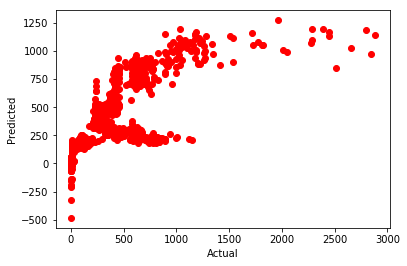

(0.66406485507415891, None)

In [115]:
train_y_7 = train_y.shift(periods=-7, freq=None, axis=0)
pre_train = pd.concat([train_x,train_y_7], axis = 1).dropna()
train_x = pre_train[['Transactions', 'UniqueAdresses','TransactionVolume','BitCoinInCirculation']]
train_y = pre_train['MarketPrice']

lm1 = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
lm1.fit(train_x,train_y)
yhat = pd.DataFrame(lm1.predict(train_x))
yhat.columns = ['yhat']
lm1.score(train_x, train_y, sample_weight=None)

plotter =  pd.concat([train_y, yhat], axis=1)
plotter
plt.plot(plotter.MarketPrice, plotter.yhat, 'ro')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
lm1.score(train_x, train_y, sample_weight=None),plt.show()

<h3> 30 day forecast </h3>

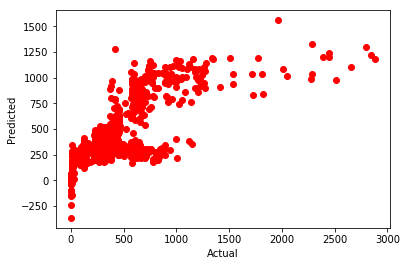

(0.68476109163893528, None)

In [117]:
train_y_30 = train_y.shift(periods=-30, freq=None, axis=0)
pre_train = pd.concat([train_x,train_y_30], axis = 1).dropna()
train_x = pre_train[['Transactions', 'UniqueAdresses','TransactionVolume','BitCoinInCirculation']]
train_y = pre_train['MarketPrice']

lm1 = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
lm1.fit(train_x,train_y)
yhat = pd.DataFrame(lm1.predict(train_x))
yhat.columns = ['yhat']
lm1.score(train_x, train_y, sample_weight=None)

plotter =  pd.concat([train_y, yhat], axis=1)
plotter
plt.plot(plotter.MarketPrice, plotter.yhat, 'ro')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
lm1.score(train_x, train_y, sample_weight=None),plt.show()

In [120]:
list_y = []
for i in range(0,len(train_y)-30):
    print(train_y[i],train_y[i+30])

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


<h3> Same but testing other algorithms</h3>

In [125]:
X_train, X_test, y_train, y_test = train_test_split( train_x, train_y, test_size=0.20, random_state=42)

In [145]:
"""
Boosting Tree Regressor - Note Looking at the analysis this doesn't really look healthy to me. 
Besides the fact that it can now predict higher than 1300 dollar

"""


BTR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=6, random_state=0, loss='ls').fit(X_train, y_train)
mean_squared_error(y_test, BTR.predict(X_test)) 
BTR.score(X_train, y_train, sample_weight=None),BTR.score(X_test, y_test, sample_weight=None)




(0.99987069830028519, 0.99267239034112231)

0.67263557694687481

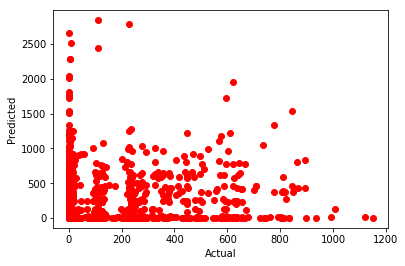

In [146]:
yhat = pd.DataFrame(BTR.predict(X_train))
yhat.columns = ['yhat']
lm1.score(train_x, train_y, sample_weight=None)

plotter =  pd.concat([train_y, yhat], axis=1)
plotter
plt.plot(plotter.MarketPrice, plotter.yhat, 'ro')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
lm1.score(X_test, y_test, sample_weight=None)

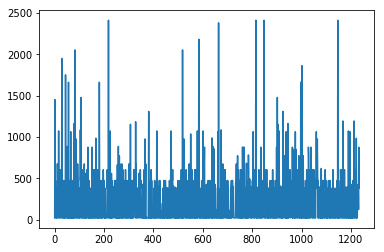

In [135]:
plt.plot(yhat)